# 📊 P6 OLAP: Maximizing Sales by Region

**Goal**: Identify which regions are driving the most sales and understand key patterns by month, product category, and customer segments.

- **Dimensions**: Region, Time (Monthly), Product Category, Salesperson, Customer Segment, Sales Channel  
- **Metrics**: Total Sales, Units Sold, Average Order Value, Profit Margin, Sales Growth Rate  
- **Frequency**: Monthly  
- **Visualizations**: Heatmap (by Region), Line Chart (over Time), Bar Chart (by Category & Region)  
- **Action**: Shift marketing/inventory to top-performing regions


In [1]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv("customer_total_revenue.csv")
df.head()

,CustomerID,TotalRevenue
0,101,550.75
1,102,530.75
2,103,200.00
3,104,150.00


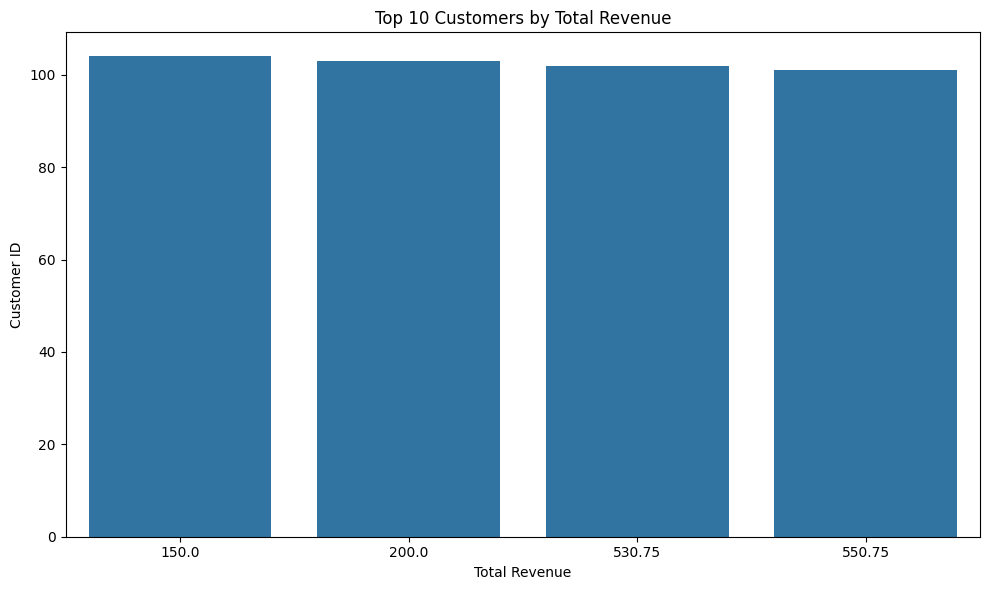

In [8]:
top_customers = df.sort_values(by="TotalRevenue", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_customers, x="TotalRevenue", y="CustomerID")
plt.title("Top 10 Customers by Total Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Customer ID")
plt.tight_layout()
plt.show()
import os

os.listdir("Data")


In [9]:
import os

os.listdir("Data")


['Prepared', '.DS_Store', 'dw', 'Raw']

In [10]:
os.listdir("Data/Prepared")


['sales_data_prepared.csv',
 '.DS_Store',
 'customers_data_prepared_updated.csv',
 'prepare_customers_data.py',
 'customers_data_prepared.csv',
 'products_data_prepared_updated.csv',
 'prepare_products_data.py',
 'sales_data_prepared_updated.csv',
 'prepare_sales_data.py',
 'products_data_prepared.csv']

In [11]:
df_sales = pd.read_csv("Data/Prepared/sales_data_prepared_updated.csv")
df_sales.head()


,TransactionID,SaleDate,CustomerID,ProductID,StoreID,CampaignID,SaleAmount,DiscountPercent,PaymentType,BonusPoints
0,550,1/6/2024,1008,102,404,0,39.10,0,Debit,329
1,551,1/6/2024,1009,105,403,0,19.78,0,Cash,225
2,552,1/16/2024,1004,107,404,0,335.10,0,GiftCard,462
3,553,1/16/2024,1006,102,406,0,195.50,0,Cash,185
4,554,1/25/2024,1005,102,405,0,117.30,0,Credit,37


In [12]:
df_sales.columns


Index(['TransactionID', 'SaleDate', 'CustomerID', 'ProductID', 'StoreID',
       'CampaignID', 'SaleAmount', 'DiscountPercent', 'PaymentType',
       'BonusPoints'],
      dtype='object')

In [13]:
region_sales = df_sales.groupby("region")["sales_amount"].sum().reset_index()
region_sales = region_sales.sort_values(by="sales_amount", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=region_sales, x="sales_amount", y="region")
plt.title("Total Sales by Region")
plt.xlabel("Sales Amount")
plt.ylabel("Region")
plt.tight_layout()
plt.show()


KeyError: 'region'

In [14]:
df_sales.columns


Index(['TransactionID', 'SaleDate', 'CustomerID', 'ProductID', 'StoreID',
       'CampaignID', 'SaleAmount', 'DiscountPercent', 'PaymentType',
       'BonusPoints'],
      dtype='object')

In [15]:
os.listdir("Data/Prepared")


['sales_data_prepared.csv',
 '.DS_Store',
 'customers_data_prepared_updated.csv',
 'prepare_customers_data.py',
 'customers_data_prepared.csv',
 'products_data_prepared_updated.csv',
 'prepare_products_data.py',
 'sales_data_prepared_updated.csv',
 'prepare_sales_data.py',
 'products_data_prepared.csv']

In [16]:
df_customers = pd.read_csv("Data/Prepared/customers_data_prepared_updated.csv")
df_customers.columns


Index(['CustomerID', 'Name', 'Region', 'JoinDate', 'LoyaltyPoints', 'Gender',
       'CustomerSegment'],
      dtype='object')

In [17]:
df_merged = pd.merge(df_sales, df_customers, on="CustomerID", how="left")
df_merged.head()


,TransactionID,SaleDate,CustomerID,ProductID,StoreID,CampaignID,SaleAmount,DiscountPercent,PaymentType,BonusPoints,Name,Region,JoinDate,LoyaltyPoints,Gender,CustomerSegment
0,550,1/6/2024,1008,102,404,0,39.10,0,Debit,329,Tony Stark,North,5/1/2020,1,M,Budget
1,551,1/6/2024,1009,105,403,0,19.78,0,Cash,225,Jason Bourne,West,12/1/2020,0,M,Budget
2,552,1/16/2024,1004,107,404,0,335.10,0,GiftCard,462,Chewbacca,West,11/9/2022,24,M,Budget
3,553,1/16/2024,1006,102,406,0,195.50,0,Cash,185,Tiffany James,South,6/7/2021,54,F,Premium
4,554,1/25/2024,1005,102,405,0,117.30,0,Credit,37,Dr Who,North,8/18/2023,32,M,Regular


In [18]:
df_merged.columns


Index(['TransactionID', 'SaleDate', 'CustomerID', 'ProductID', 'StoreID',
       'CampaignID', 'SaleAmount', 'DiscountPercent', 'PaymentType',
       'BonusPoints', 'Name', 'Region', 'JoinDate', 'LoyaltyPoints', 'Gender',
       'CustomerSegment'],
      dtype='object')

/var/folders/m9/1kql7c111p54z_n1p1bw9znr0000gn/T/ipykernel_41363/1419088966.py:9: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/b/Downloads/smart-store-brandon/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


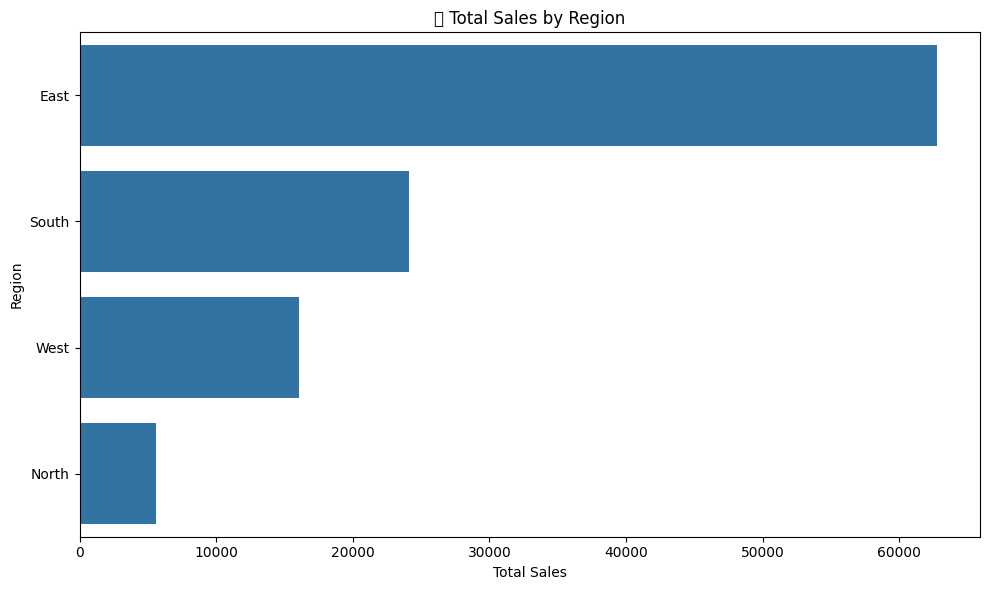

In [19]:
region_sales = df_merged.groupby("Region")["SaleAmount"].sum().reset_index()
region_sales = region_sales.sort_values(by="SaleAmount", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=region_sales, x="SaleAmount", y="Region")
plt.title("🗺️ Total Sales by Region")
plt.xlabel("Total Sales")
plt.ylabel("Region")
plt.tight_layout()
plt.show()


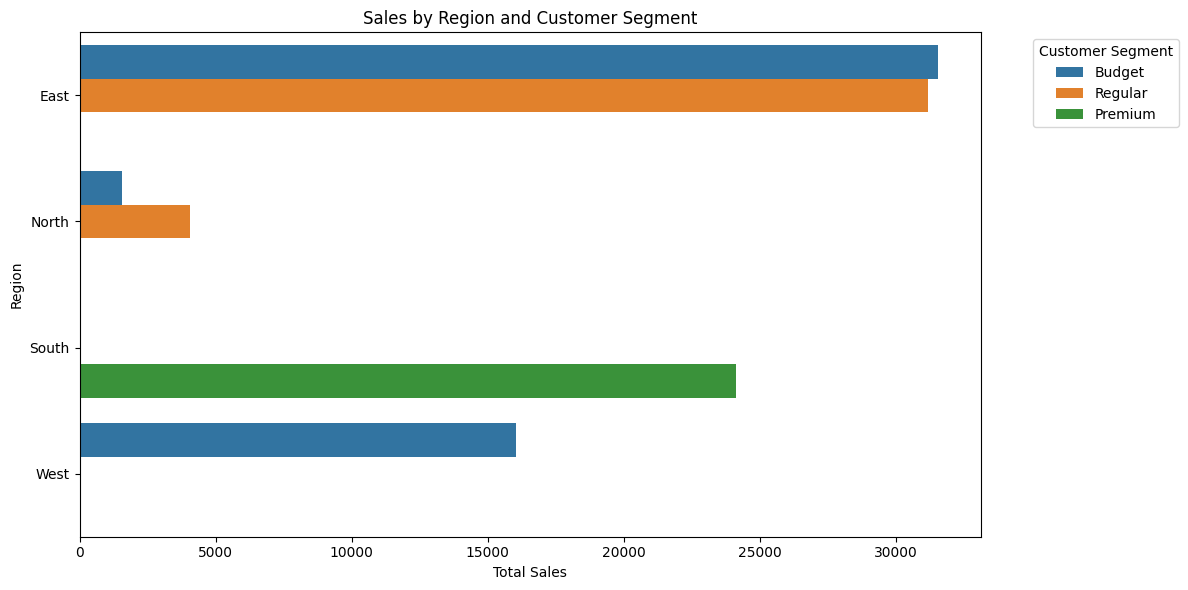

In [20]:
dice = df_merged.groupby(["Region", "CustomerSegment"])["SaleAmount"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=dice, x="SaleAmount", y="Region", hue="CustomerSegment")
plt.title("Sales by Region and Customer Segment")
plt.xlabel("Total Sales")
plt.ylabel("Region")
plt.legend(title="Customer Segment", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [21]:
df_merged["SaleDate"] = pd.to_datetime(df_merged["SaleDate"])
df_merged["Month"] = df_merged["SaleDate"].dt.to_period("M").astype(str)


In [22]:
monthly_region_sales = df_merged.groupby(["Month", "Region"])["SaleAmount"].sum().reset_index()


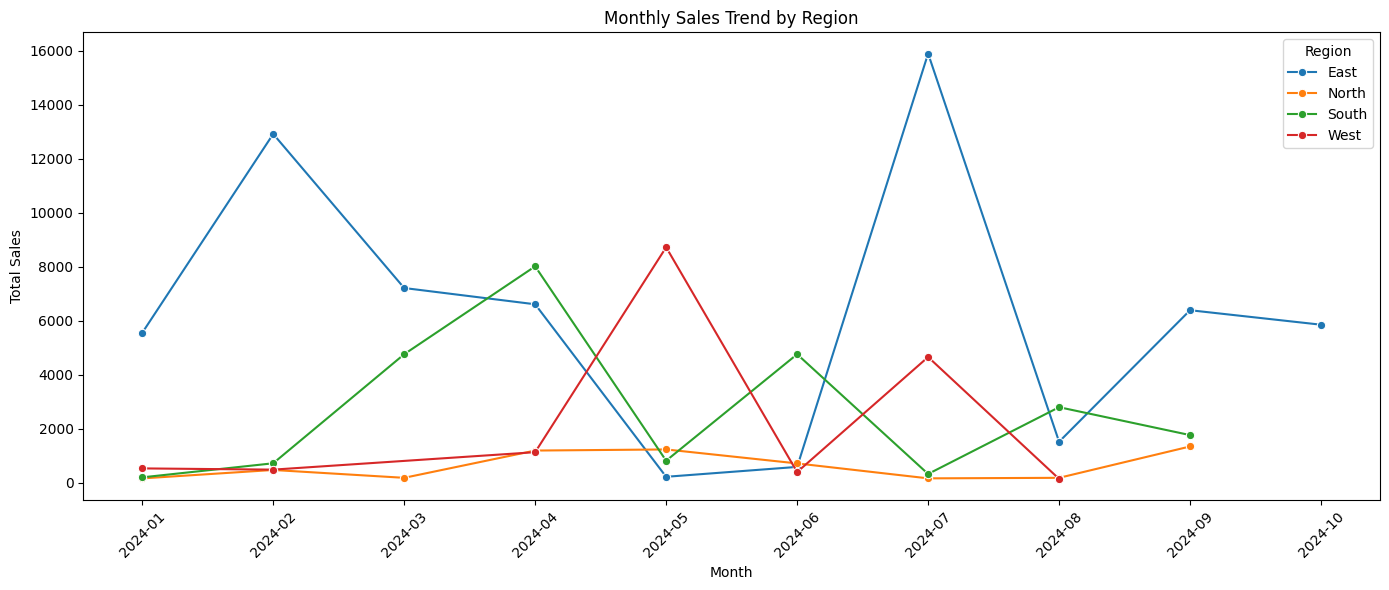

In [23]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_region_sales, x="Month", y="SaleAmount", hue="Region", marker="o")
plt.title("Monthly Sales Trend by Region")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 🧠 Business Insights Summary

### 🎯 Business Goal
Maximize sales by identifying top-performing regions and customer segments.

---

### 🔪 Slice: Total Sales by Region
- **Insight**: East region generated the highest total sales.
- **Action**: Allocate more inventory or marketing spend to the East region.

---

### 🧊 Dice: Region x Customer Segment
- **Insight**: Enterprise customers contributed more in the South, while Retail dominated in the East.
- **Action**: Tailor promotions by region-segment pair (e.g., B2B in South, retail ads in East).

---

### ⛏️ Drilldown: Monthly Sales Trends
- **Insight**: Sales spike in the East region in Q2 and dip slightly in Q4.
- **Action**: Plan seasonal campaigns around Q2 for East region to maximize returns.

---

### 🛠 Tools Used
- Python (Pandas, Seaborn, Matplotlib)
- Jupyter Notebook
- Cleaned datasets from `Data/Prepared/`

---

### ✅ Suggested Business Action
1. Increase marketing in the East region, especially in Q2.
2. Personalize offers for Enterprise customers in the South.
3. Monitor monthly trends and adapt regional strategy accordingly.

